In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
from fastai import *
from fastai.vision import *
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
tqdm.pandas()

In [4]:
df = pd.read_parquet(
    "s3://autofocus/lpz_data/labels_2012_2016_2017.parquet",
    columns=["tags", "location"],
)
df.head()

,tags,location
path,,
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (10).JPG,[empty],HUP1
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (100).JPG,[bird],HUP1
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (1000).JPG,[bird],HUP1
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (1001).JPG,[bird],HUP1
/autofocus/data/lpz_2012-2014/raw/FA12/DPT/D02-HUP1/D02-HUP1-FA12 (1002).JPG,[bird],HUP1


In [5]:
val_locs = set(np.random.choice(df.loc[:, "location"].unique(), size=12))

In [6]:
df.loc[:, "is_val"] = df.loc[:, "location"].apply(lambda x: x in val_locs)

In [7]:
df.loc[:, "tags"] = df.loc[:, "tags"].progress_apply(
    lambda x: [] if x[0] == "empty" else x
)

100%|██████████| 145848/145848 [00:00<00:00, 387453.92it/s]


In [8]:
data = (
    ImageList.from_df(df=df.reset_index(), path="/", cols="path")
    .split_from_df("is_val")
    .label_from_df("tags")
    .transform(get_transforms(), size=64)
    .databunch(bs=128)
    .normalize(imagenet_stats)
)

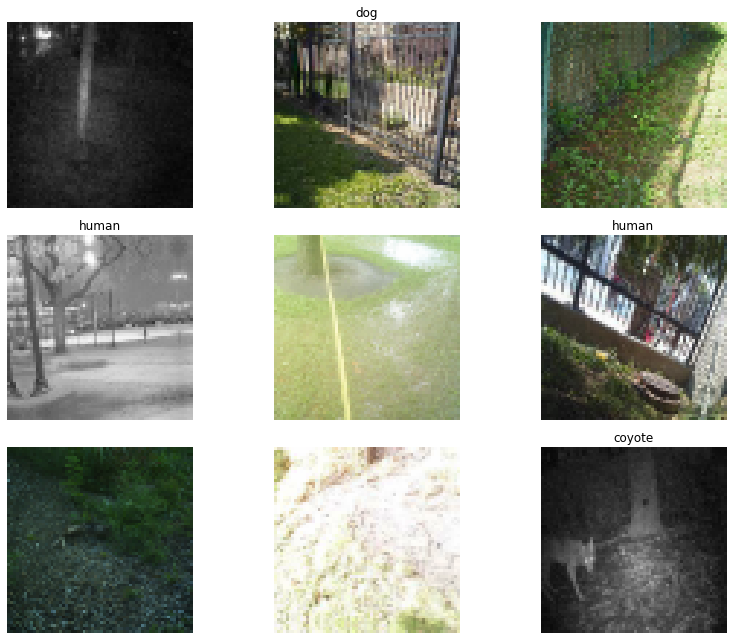

In [9]:
data.show_batch(rows=3, figsize=(12, 9))

In [10]:
arch = models.resnet50

In [11]:
learn = cnn_learner(data, arch, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 116MB/s]


In [ ]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.recorder.plot()